# <center>Homework 2</center>

In [1]:
%run load-packages.ipynb
%run stats-libs.ipynb

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Matplotlib version 3.2.2
Numpy version 1.18.5
Pandas version 1.0.5
Scipy version 1.5.3
Seaborn version 0.10.1
Statsmodels version 0.11.1
Sklearn version 0.23.2

Set Pandas float printout to three digits ... 


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs

Setting seaborn and matplotlib graphic parameters ...


Load custom statistics functions  ... 
check_anova_normality(group, x)  ...
check_normality(x)  ...
gen_factorial_matrix(num_factors, interaction=True, num_replications=1)  ...
check_linreg_residuals(model)  ...
lr_logit_test(model)  ...
pseudo_r2(model, y)  ...
gof_logit_test(model, y)  ...


# 1. Wifi Throughput

### Read File

In [2]:
import pandas as pd
wifi_data = pd.read_excel('lect07-2k-factorial.xlsx', sheet_name='WiFiThruput')
wifi_data

,Factor A,Factor B,Factor C,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Total
0,-1,-1,-1,93.540,96.400,93.380,92.910,90.700,466.930
1,1,-1,-1,94.980,90.090,96.240,98.970,92.020,472.300
2,-1,1,-1,89.170,89.160,85.490,86.580,86.120,436.520
3,1,1,-1,84.740,87.480,83.530,91.850,84.890,432.490
4,-1,-1,1,112.410,113.970,106.790,110.340,109.930,553.440
5,1,-1,1,105.990,111.570,107.630,115.040,108.380,548.610
6,-1,1,1,95.270,96.460,87.920,88.380,94.410,462.440
7,1,1,1,91.300,94.570,94.950,94.630,96.370,471.820


In [3]:
#wifi_data.columns

### Add Data

In [4]:
y = wifi_data[['Unnamed: 3', 'Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']].melt()
y = y.value.values
y

array([ 93.54,  94.98,  89.17,  84.74, 112.41, 105.99,  95.27,  91.3 ,
        96.4 ,  90.09,  89.16,  87.48, 113.97, 111.57,  96.46,  94.57,
        93.38,  96.24,  85.49,  83.53, 106.79, 107.63,  87.92,  94.95,
        92.91,  98.97,  86.58,  91.85, 110.34, 115.04,  88.38,  94.63,
        90.7 ,  92.02,  86.12,  84.89, 109.93, 108.38,  94.41,  96.37])

### Create Design Metrix

In [5]:
Xmain=np.array([[+1,-1,-1,-1],
                [+1,+1,-1,-1],
                [+1,-1,+1,-1],
                [+1,+1,+1,-1],
                [+1,-1,-1,+1],
                [+1,+1,-1,+1],
                [+1,-1,+1,+1],
                [+1,+1,+1,+1],
                [+1,-1,-1,-1],
                [+1,+1,-1,-1],
                [+1,-1,+1,-1],
                [+1,+1,+1,-1],
                [+1,-1,-1,+1],
                [+1,+1,-1,+1],
                [+1,-1,+1,+1],
                [+1,+1,+1,+1],
                [+1,-1,-1,-1],
                [+1,+1,-1,-1],
                [+1,-1,+1,-1],
                [+1,+1,+1,-1],
                [+1,-1,-1,+1],
                [+1,+1,-1,+1],
                [+1,-1,+1,+1],
                [+1,+1,+1,+1],
                [+1,-1,-1,-1],
                [+1,+1,-1,-1],
                [+1,-1,+1,-1],
                [+1,+1,+1,-1],
                [+1,-1,-1,+1],
                [+1,+1,-1,+1],
                [+1,-1,+1,+1],
                [+1,+1,+1,+1],
                [+1,-1,-1,-1],
                [+1,+1,-1,-1],
                [+1,-1,+1,-1],
                [+1,+1,+1,-1],
                [+1,-1,-1,+1],
                [+1,+1,-1,+1],
                [+1,-1,+1,+1],
                [+1,+1,+1,+1]])
Xdf = pd.DataFrame(Xmain, columns=['Intercept','A','B','C'])
Xdf['AB'] = Xdf['A']*Xdf['B']
Xdf['AC'] = Xdf['A']*Xdf['C']
Xdf['BC'] = Xdf['B']*Xdf['C']
Xdf['ABC'] = Xdf['A']*Xdf['B']*Xdf['C']
Xdf

,Intercept,A,B,C,AB,AC,BC,ABC
0,1,-1,-1,-1,1,1,1,-1
1,1,1,-1,-1,-1,-1,1,1
2,1,-1,1,-1,-1,1,-1,1
3,1,1,1,-1,1,-1,-1,-1
4,1,-1,-1,1,1,-1,-1,1
5,1,1,-1,1,-1,1,-1,-1
6,1,-1,1,1,-1,-1,1,-1
7,1,1,1,1,1,1,1,1
8,1,-1,-1,-1,1,1,1,-1
9,1,1,-1,-1,-1,-1,1,1


### Full Model

#### Fit Model

In [6]:
import statsmodels.api as sm

wifi_model = sm.OLS(y, Xdf).fit()
wifi_model.summary2()
wifi_model

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.894   
Dependent Variable: y                AIC:                207.6170
Date:               2020-10-29 09:28 BIC:                221.1281
No. Observations:   40               Log-Likelihood:     -95.809 
Df Model:           7                F-statistic:        48.17   
Df Residuals:       32               Prob (F-statistic): 3.27e-15
R-squared:          0.913            Scale:              8.8083  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    96.1137    0.4693  204.8188  0.0000  95.1579  97.0696
A             0.1473    0.4693    0.3138  0.7557  -0.8086   1.1031
B            -5.9503    0.4693  -12.6800  0.0000  -6.9061  -4.9944
C             5.7018    0.4693   12.1505  0.0000   4.7459   6.6576
AB            0.1203    0.4693    0.2563  0.7994  -0.8356   1.0761
AC            0.0802    0.4693    0.1710  0.8653  -0.8756   1.0361
BC           -2.4392    0.4693   -5.1981  0.0000  -3.3951  -1.4834
ABC           0.5903    0.4693    1.2578  0.2176  -0.3656   1.5461
-----------------------------------------------------------------
Omnibus:              1.491        Durbin-Watson:           2.235
Prob(Omnibus):        0.474        Jarque-Bera (JB):        1.118
Skew:                 0.148        Prob(JB):                0.572
Kurtosis:             2.236        Condition No.:           1    
=================================================================

"""

จากตารางข้างต้นพบว่า factor A, AB, AC, ABC มี p-values > 0.05 ซึ่งแสดงให้เห็นว่าไม่มีความสัมพันธ์กับค่า Throughput ที่ระดับนัยสำคัญ 0.05 

### Reduced Model

Drop factor ที่ไม่มีนัยสำคัญออกเพื่อให้ได้ reduced model 

#### Fit Model

In [7]:
import statsmodels.api as sm

wifi_reduced_model = sm.OLS(y,Xdf.drop(columns=['A','AB','AC','ABC'])).fit()
wifi_reduced_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.901   
Dependent Variable: y                AIC:                201.7770
Date:               2020-10-29 09:28 BIC:                208.5326
No. Observations:   40               Log-Likelihood:     -96.889 
Df Model:           3                F-statistic:        119.2   
Df Residuals:       36               Prob (F-statistic): 9.40e-19
R-squared:          0.909            Scale:              8.2640  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    96.1137    0.4545  211.4561  0.0000  95.1919  97.0356
B            -5.9503    0.4545  -13.0909  0.0000  -6.8721  -5.0284
C             5.7017    0.4545   12.5442  0.0000   4.7799   6.6236
BC           -2.4392    0.4545   -5.3665  0.0000  -3.3611  -1.5174
-----------------------------------------------------------------
Omnibus:               1.397        Durbin-Watson:          2.251
Prob(Omnibus):         0.497        Jarque-Bera (JB):       1.021
Skew:                  -0.064       Prob(JB):               0.600
Kurtosis:              2.228        Condition No.:          1    
=================================================================

"""

เมื่อทำ Reduced Model แล้วจะพบว่า factors มี p-values < 0.05 ซึ่งแสดงให้เห็นว่า Factor B, C, BC มีความสัมพันธ์กับค่า Throughput ที่ระดับนัยสำคัญ 0.05

### Effect B

Text(0.5, 0, 'B')

Text(0, 0.5, 'Average of throughput')

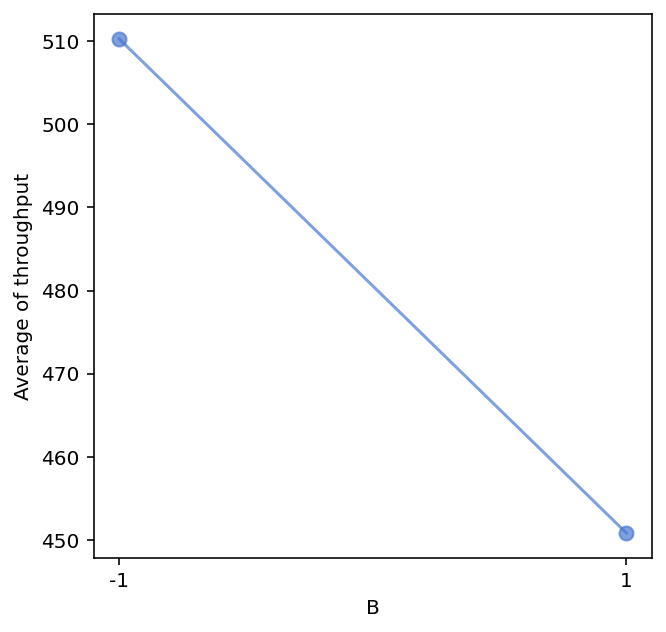

In [8]:
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(5,5)) 


B_effect = wifi_data.groupby('Factor B').aggregate({'Total':'mean'}).reset_index()
ax1.plot( B_effect['Factor B'].astype('str'), B_effect.Total,
        ms=7, marker='o', alpha=0.7)
ax1.set_xlabel('B')
ax1.set_ylabel('Average of throughput')

In [9]:
total_y = wifi_data[['Total']].values
total_y

array([[466.93],
       [472.3 ],
       [436.52],
       [432.49],
       [553.44],
       [548.61],
       [462.44],
       [471.82]])

In [10]:
import numpy as np
k = 3
n = 5

contrast_eff = Xdf.iloc[:8,2:3].mul(total_y).sum()
print('Contrast effects\n', contrast_eff.to_string(), sep='')

effects = (contrast_eff)/((2**(k-1))*n)
print('\nEffect estimates\n', effects.to_string(), sep='')

ss_eff = (contrast_eff**2)/((2**k)*n)
print('\nSS effects\n', ss_eff.to_string(), sep='')

Contrast effects
B   -238.010

Effect estimates
B   -11.901

SS effects
B   1416.219


จากกราฟและผล effect estimates ของ factor B พบว่าจำนวน Factor B (Number of Nodes) ที่ลดลง ส่งผลให้ Throughput มีค่ามากขึ้น

------------------

# 2. Chemical Process

### Create Design Metrix

In [11]:
Xmain=np.array([[+1,-1,-1,-1,-1],
                [+1,+1,-1,-1,-1],
                [+1,-1,+1,-1,-1],
                [+1,+1,+1,-1,-1],
                [+1,-1,-1,+1,-1],
                [+1,+1,-1,+1,-1],
                [+1,-1,+1,+1,-1],
                [+1,+1,+1,+1,-1],
                [+1,-1,-1,-1,+1],
                [+1,+1,-1,-1,+1],
                [+1,-1,+1,-1,+1],
                [+1,+1,+1,-1,+1],
                [+1,-1,-1,+1,+1],
                [+1,+1,-1,+1,+1],
                [+1,-1,+1,+1,+1],
                [+1,+1,+1,+1,+1],
                [+1,-1,-1,-1,-1],
                [+1,+1,-1,-1,-1],
                [+1,-1,+1,-1,-1],
                [+1,+1,+1,-1,-1],
                [+1,-1,-1,+1,-1],
                [+1,+1,-1,+1,-1],
                [+1,-1,+1,+1,-1],
                [+1,+1,+1,+1,-1],
                [+1,-1,-1,-1,+1],
                [+1,+1,-1,-1,+1],
                [+1,-1,+1,-1,+1],
                [+1,+1,+1,-1,+1],
                [+1,-1,-1,+1,+1],
                [+1,+1,-1,+1,+1],
                [+1,-1,+1,+1,+1],
                [+1,+1,+1,+1,+1]])
Xdf = pd.DataFrame(Xmain, columns=['Intercept','A','B','C','D'])
Xdf['AB'] = Xdf['A']*Xdf['B']
Xdf['AC'] = Xdf['A']*Xdf['C']
Xdf['AD'] = Xdf['A']*Xdf['D']
Xdf['BC'] = Xdf['B']*Xdf['C']
Xdf['BD'] = Xdf['B']*Xdf['D']
Xdf['CD'] = Xdf['C']*Xdf['D']
Xdf['ABC'] = Xdf['A']*Xdf['B']*Xdf['C']
Xdf['ABD'] = Xdf['A']*Xdf['B']*Xdf['D']
Xdf['ACD'] = Xdf['A']*Xdf['C']*Xdf['D']
Xdf['BCD'] = Xdf['B']*Xdf['C']*Xdf['D']
Xdf['ABCD'] = Xdf['A']*Xdf['B']*Xdf['C']*Xdf['D']
Xdf

,Intercept,A,B,C,D,AB,AC,AD,BC,BD,CD,ABC,ABD,ACD,BCD,ABCD
0,1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,1
1,1,1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1
2,1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,1,-1,1,-1
3,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1
4,1,-1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,1,-1
5,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,1,1
6,1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,1
7,1,1,1,1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,-1
8,1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,1,1,-1
9,1,1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,1,1


### 2a) Factor Effect

In [12]:
y_effect = np.array([[90,93],
             [74,78],
             [81,85],
             [83,80],
             [77,78],
             [81,80],
             [88,82],
             [73,70],
             [98,95],
             [72,76],
             [87,83],
             [85,86],
             [99,90],
             [79,75],
             [87,84],
             [80,80]])

In [13]:
total_y = np.c_[y_effect.sum(axis=1)]
total_y

array([[183],
       [152],
       [166],
       [163],
       [155],
       [161],
       [170],
       [143],
       [193],
       [148],
       [170],
       [171],
       [189],
       [154],
       [171],
       [160]])

In [14]:
k = 4
n = 2

contrast_eff = Xdf.iloc[:16,1:].mul(total_y).sum()
print('Contrast effects\n', contrast_eff.to_string(), sep='')

effects = (contrast_eff)/((2**(k-1))*n)
print('\nEffect estimates\n', effects.to_string(), sep='')

ss_eff = (contrast_eff**2)/((2**k)*n)
print('\nSS effects\n', ss_eff.to_string(), sep='')

Contrast effects
A      -145
B       -21
C       -43
D        63
AB       65
AC       11
AD      -35
BC       -9
BD       -3
CD       27
ABC     -83
ABD      75
ACD     -15
BCD     -15
ABCD     39

Effect estimates
A      -9.062
B      -1.312
C      -2.688
D       3.938
AB      4.062
AC      0.688
AD     -2.188
BC     -0.562
BD     -0.188
CD      1.688
ABC    -5.188
ABD     4.688
ACD    -0.938
BCD    -0.938
ABCD    2.438

SS effects
A      657.031
B       13.781
C       57.781
D      124.031
AB     132.031
AC       3.781
AD      38.281
BC       2.531
BD       0.281
CD      22.781
ABC    215.281
ABD    175.781
ACD      7.031
BCD      7.031
ABCD    47.531


Factor Effect สามารถดูได้จากค่า Effect estimates ซึ่งแต่ละ Factors มีค่า ดังนี้\
A   = -9.062\
B    =  -1.312\
C     = -2.688\
D     =  3.938\
AB    =  4.062\
AC   =   0.688\
AD    = -2.188\
BC    = -0.562\
BD  =   -0.188\
CD   =   1.688\
ABC   = -5.188\
ABD   =  4.688\
ACD   = -0.938\
BCD   = -0.938\
ABCD  =  2.438\
(เช่น factor A มี effect estimates ที่ -9.062 หมายความว่าเมื่อเปลี่ยนค่าจาก Low level ไปเป็น High level จะทำให้ Response เปลี่ยนไป - 9.062 หน่วย)

### Add response values

In [42]:
y = np.c_[[36.17,56.26,47.48,61.51,31.24,56.26,51.13,65.32,38.40,51.35,45.88,61.29,39.05,52.81,56.96,60.67,33.31,52.2,47.68,57.72]]

In [38]:
total_y = np.c_([[178.17],
                [268.88],
                [249.14],
                [306.51]]
total_y

array([[178.17, 268.88, 249.14, 306.51]])

In [39]:
Xmain=np.array([[+1,-1,-1],
                [+1,+1,-1],
                [+1,-1,+1],
                [+1,+1,+1],
               [+1,-1,-1],
                [+1,+1,-1],
                [+1,-1,+1],
                [+1,+1,+1],
               [+1,-1,-1],
                [+1,+1,-1],
                [+1,-1,+1],
                [+1,+1,+1],
               [+1,-1,-1],
                [+1,+1,-1],
                [+1,-1,+1],
                [+1,+1,+1],
               [+1,-1,-1],
                [+1,+1,-1],
                [+1,-1,+1],
                [+1,+1,+1]])

bac_growth = pd.DataFrame(Xmain, columns=['Intercept','A','B'])


bac_growth['AB'] = bac_growth['A']*bac_growth['B']
bac_growth

,Intercept,A,B,AB
0,1,-1,-1,1
1,1,1,-1,-1
2,1,-1,1,-1
3,1,1,1,1
4,1,-1,-1,1
5,1,1,-1,-1
6,1,-1,1,-1
7,1,1,1,1
8,1,-1,-1,1
9,1,1,-1,-1


In [41]:
# k=2
# n=5

# contrast_eff = bac_growth.iloc[:,1:].mul(total_y).sum()
# print('Contrast effects\n', bac_growth.to_string(), sep='')

# effects = (contrast_eff)/((2**(k-1))*n)
# print('\nEffect estimates\n', effects.to_string(), sep='')

# ss_eff = (contrast_eff**2)/((2**k)*n)
# print('\nSS effects\n', ss_eff.to_string(), sep='')

### Full Model

#### fit model

In [43]:
from statsmodels.formula.api import ols
chem_model = ols('y ~ A+B+AB',data=bac_growth).fit() 
chem_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.892   
Dependent Variable: y                AIC:                107.9838
Date:               2020-10-29 09:45 BIC:                111.9667
No. Observations:   20               Log-Likelihood:     -49.992 
Df Model:           3                F-statistic:        53.49   
Df Residuals:       16               Prob (F-statistic): 1.46e-08
R-squared:          0.909            Scale:              10.853  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     50.1345    0.7367  68.0571  0.0000  48.5729  51.6961
A              7.4045    0.7367  10.0515  0.0000   5.8429   8.9661
B              5.4295    0.7367   7.3705  0.0000   3.8679   6.9911
AB            -1.6665    0.7367  -2.2623  0.0380  -3.2281  -0.1049
-----------------------------------------------------------------
Omnibus:              1.411        Durbin-Watson:           1.842
Prob(Omnibus):        0.494        Jarque-Bera (JB):        1.054
Skew:                 0.538        Prob(JB):                0.591
Kurtosis:             2.671        Condition No.:           1    
=================================================================

"""

### 2b) Anova table

In [44]:
from statsmodels.stats.anova import anova_lm
aov_table = anova_lm(chem_model) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
A,1.000,1096.532,1096.532,101.034,0.000
B,1.000,589.589,589.589,54.324,0.000
AB,1.000,55.544,55.544,5.118,0.038
Residual,16.000,173.650,10.853,nan,nan


จาก Anova table พบว่า Factor B, AC, BC, BD, CD, ACD, BCD มีค่า p-value > 0.05 ซึ่งแสดงให้เห็นว่าไม่มีความสัมพันธ์กับ Chemical process\
ที่ระดับนัยสำคัญ 0.05

### Reduced Model

#### fit model

In [18]:
chem_reduced_model = ols('y ~ Intercept+A+C+D+AB+AD+ABC+ABD+ABCD -1',data=Xdf).fit() 
chem_reduced_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.851   
Dependent Variable: y                AIC:                164.0331
Date:               2020-10-29 09:28 BIC:                177.2247
No. Observations:   32               Log-Likelihood:     -73.017 
Df Model:           8                F-statistic:        23.16   
Df Residuals:       23               Prob (F-statistic): 2.93e-09
R-squared:          0.890            Scale:              7.8139  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    82.7813    0.4941  167.5229  0.0000  81.7590  83.8035
A            -4.5313    0.4941   -9.1698  0.0000  -5.5535  -3.5090
C            -1.3437    0.4941   -2.7193  0.0122  -2.3660  -0.3215
D             1.9687    0.4941    3.9841  0.0006   0.9465   2.9910
AB            2.0313    0.4941    4.1106  0.0004   1.0090   3.0535
AD           -1.0937    0.4941   -2.2134  0.0371  -2.1160  -0.0715
ABC          -2.5938    0.4941   -5.2489  0.0000  -3.6160  -1.5715
ABD           2.3437    0.4941    4.7430  0.0001   1.3215   3.3660
ABCD          1.2188    0.4941    2.4664  0.0215   0.1965   2.2410
-----------------------------------------------------------------
Omnibus:              5.242        Durbin-Watson:           1.559
Prob(Omnibus):        0.073        Jarque-Bera (JB):        3.614
Skew:                 0.686        Prob(JB):                0.164
Kurtosis:             3.910        Condition No.:           1    
=================================================================

"""

### 2c) Regression model:
y = 82.7813 - 4.5312(x1) - 1.3438(x3) + 1.9687(x4) + 2.0312(x1x2) - 1.0937(x1x4) - 2.5938(x1x2x3) + 2.3437(x1x2x4) + 1.2188(x1x2x3x4)

#### Reduced Anova Table

In [19]:
reduced_aov_table = anova_lm(chem_reduced_model) 
reduced_aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Intercept,1.000,219287.531,219287.531,28063.923,0.000
A,1.000,657.031,657.031,84.085,0.000
C,1.000,57.781,57.781,7.395,0.012
D,1.000,124.031,124.031,15.873,0.001
AB,1.000,132.031,132.031,16.897,0.000
AD,1.000,38.281,38.281,4.899,0.037
ABC,1.000,215.281,215.281,27.551,0.000
ABD,1.000,175.781,175.781,22.496,0.000
ABCD,1.000,47.531,47.531,6.083,0.022
Residual,23.000,179.719,7.814,nan,nan


### 2d) Residual Analysis

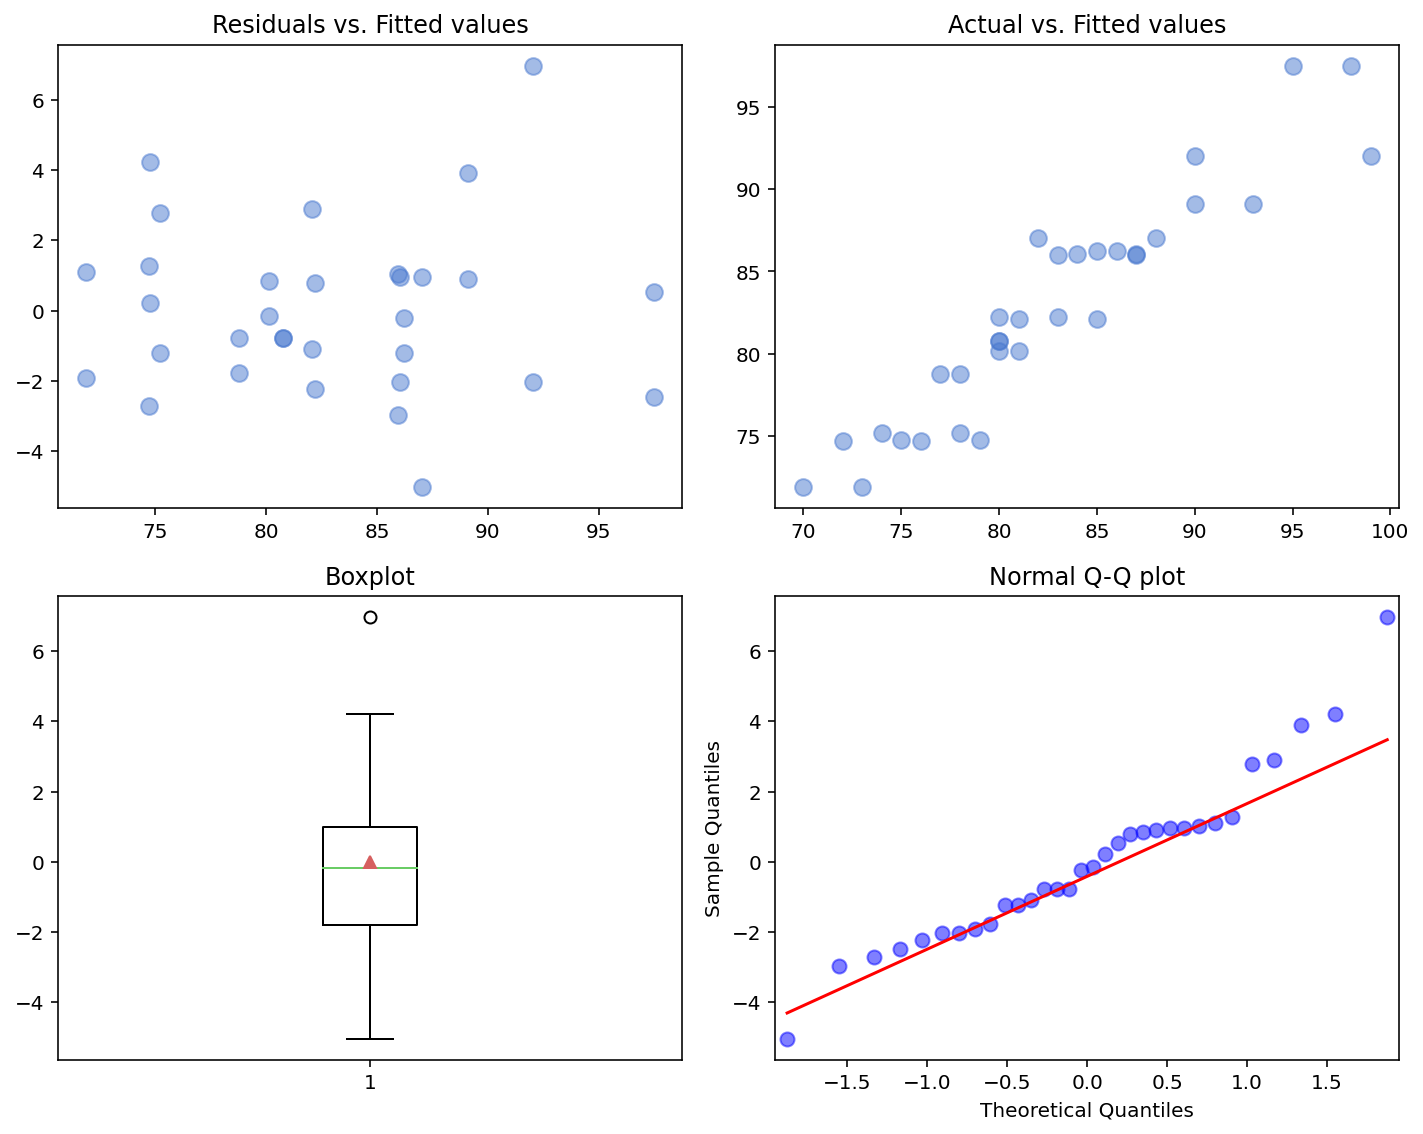

In [20]:
check_linreg_residuals(chem_reduced_model)

การกระจายตัวของ Residual error ยังไม่เป็นที่น่าพึงพอใจ เช่น ใน Boxplot ค่า mean ไม่อยู่ในจุดกึ่งกลางและยังมี outlier และ ใน Q-Q plot มี outlier อยู่นอกเส้นบางส่วนซึ่งควรที่จะเป็นส้นตรง หมายความว่า Model ยังไม่สามารถ fit ข้อมูลได้ไม่ดีเท่าที่ควร